Импортируем необходимые модели

In [6]:
import sys
from sklearn.datasets import load_digits, load_iris
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import time
import dataget
from gensim.models import Word2Vec
from gensim.downloader import load
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import MDS, Isomap
from sklearn.decomposition import FactorAnalysis, PCA
import scipy

Задаем используемые модели:

MDS - Multidimensional Scaling, нелинейный метод, старается сохранить "расстояния" между объектами при уменьшении размерности данных.

ISOMAP -  нелинейный метод, является расшриением MDS или Kernel PCA.

LDA - находит линейную комбинацию входных признаков, которая оптимизирует разделимость классов. В нем учитываются метки классов. Ограничения - данные должны быть нормально распределены, должны быть метки классов.

FA - факторный анализ, хорошо подходит для поиска скрытых переменных, выводимых из других (они и называются факторами).

In [30]:
mds = MDS(n_components=2, metric=True, random_state=2)
isomap = Isomap(n_neighbors=5, n_components=2, eigen_solver='auto')
lda = LinearDiscriminantAnalysis(n_components=2, solver='svd')
fa = FactorAnalysis(n_components=2, random_state=2)

Подгружаем датасеты.

In [31]:
#mnist
start = time.time()
mnist = pd.read_csv("https://www.openml.org/data/get_csv/52667/mnist_784.csv")
# mnist = mnist[:10000] # (70000, 785) -> (10000, 785)
display(f"Time of downloading mnist: {int(time.time() - start)} seconds")
                    
#digits
digits = load_digits()
display(f"Time of downloading digits: {int(time.time() - start)} seconds")
                    
#Fashion MNIST
start = time.time()
import dataget
__, __, fmnist_x, fmnist_y = dataget.image.fashion_mnist().get()
fmnist = fmnist_x.reshape(-1, 28*28)
display(f"Time of downloading fashion mnist: {int(time.time() - start)} seconds")

#coil20
start = time.time()
coil_20 = scipy.io.loadmat('COIL20_1.mat')
display(f"Time of downloading COIL 20: {int(time.time() - start)} seconds")

'Time of downloading mnist: 56 seconds'

'Time of downloading digits: 56 seconds'

'Time of downloading fashion mnist: 0 seconds'

'Time of downloading COIL 20: 0 seconds'

In [39]:
mnist = mnist[:10000] # (70000, 785) -> (10000, 785)

In [32]:
#Google news
start = time.time()
word_vectors = load('word2vec-google-news-300').vectors
display(f"Time of downloading google news: {int(time.time() - start)} seconds")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


'Time of downloading google news: 805 seconds'

In [44]:
word_vectors_cuted = word_vectors[:10000]

In [45]:
np.save("word_vectors", word_vectors_cuted)

Для удобства группируем модели и датасеты.

In [51]:
models = [ 
    ("MDS", mds),
    ("Isomap", isomap), ("LDA", lda), ("FA", fa)]
datasets = [("MNIST", mnist, mnist['class']), 
            ("Fashion MNIST", fmnist, fmnist_y),
            ('Word Vectors', word_vectors_cuted, None),
            ("digits", digits.data, digits.target),
            ("coil20", coil_20["X"], coil_20["Y"])
            ]

Уменьшаем размерность разными алгоритмами и визуализируем.

'Isomap is working with MNIST ((10000, 785) objects)...'

'Time: 103 seconds'

'Isomap is working with Fashion MNIST ((10000, 784) objects)...'

'Time: 92 seconds'

'Isomap is working with Word Vectors ((10000, 300) objects)...'

c:\Users\yuryp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\yuryp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\yuryp\AppData\Local\Temp\ipykernel_2704\545140867.py:31: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[i, j].scatter(embedding[:, 0], embedding[:, 1], c=datasets[j][2], cmap='Spectral', s=1)


'Time: 452 seconds'

'Isomap is working with digits ((1797, 64) objects)...'

c:\Users\yuryp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\yuryp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


'Time: 2 seconds'

'Isomap is working with coil20 ((1440, 1024) objects)...'

c:\Users\yuryp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 9 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\yuryp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\Users\yuryp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\Users\yuryp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr

'Time: 1 seconds'

'LDA is working with MNIST ((10000, 785) objects)...'

'Time: 5 seconds'

'LDA is working with Fashion MNIST ((10000, 784) objects)...'

'Time: 4 seconds'

'LDA is working with Word Vectors ((10000, 300) objects)...'

'LDA is working with digits ((1797, 64) objects)...'

'Time: 0 seconds'

'LDA is working with coil20 ((1440, 1024) objects)...'

c:\Users\yuryp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


'Time: 2 seconds'

'FA is working with MNIST ((10000, 785) objects)...'

'Time: 2 seconds'

'FA is working with Fashion MNIST ((10000, 784) objects)...'

'Time: 3 seconds'

'FA is working with Word Vectors ((10000, 300) objects)...'

C:\Users\yuryp\AppData\Local\Temp\ipykernel_2704\545140867.py:31: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[i, j].scatter(embedding[:, 0], embedding[:, 1], c=datasets[j][2], cmap='Spectral', s=1)


'Time: 0 seconds'

'FA is working with digits ((1797, 64) objects)...'

'Time: 0 seconds'

'FA is working with coil20 ((1440, 1024) objects)...'

'Time: 0 seconds'

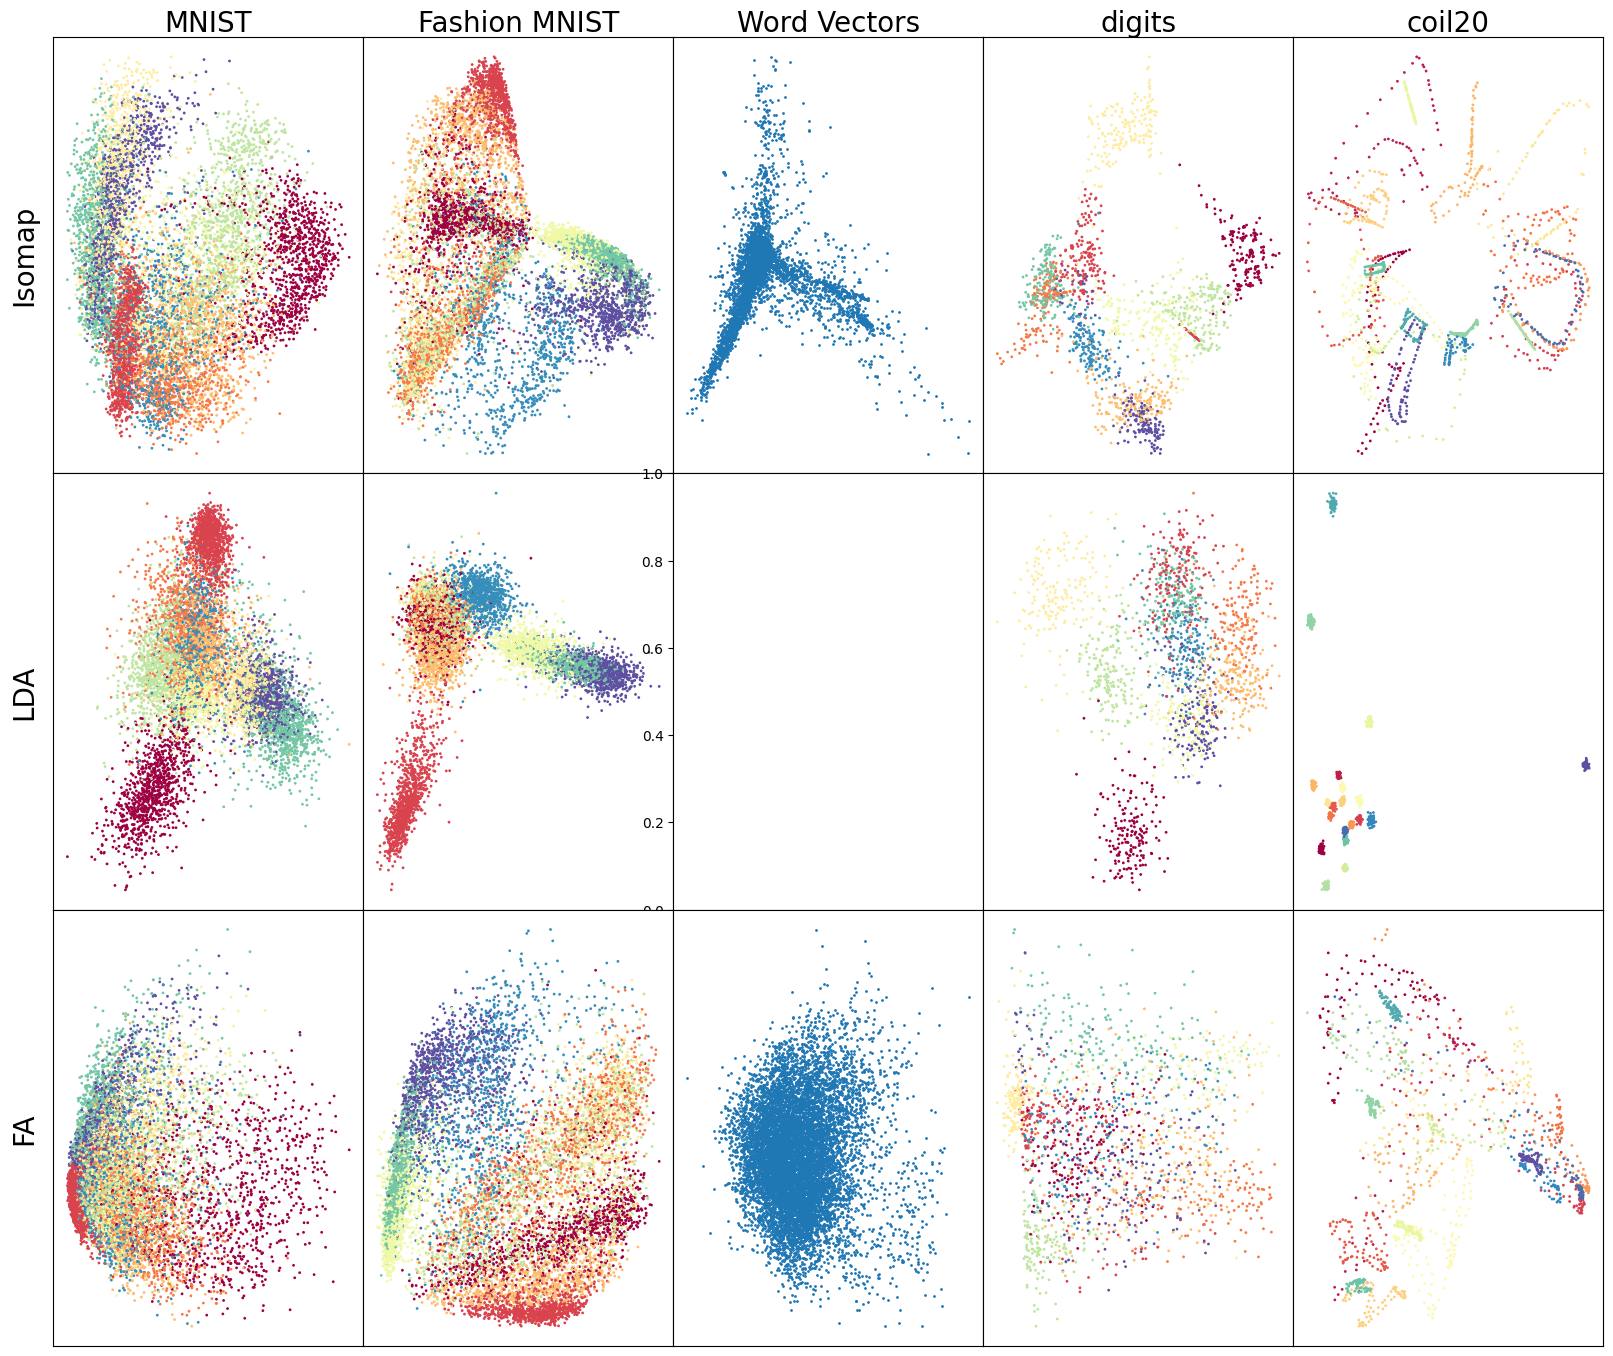

In [50]:
rows = len(models)
cols = len(datasets)
fig = plt.figure(figsize=(20, 17))
gs = fig.add_gridspec(rows, cols, hspace=0, wspace=0)
ax = gs.subplots()
for j in range(cols):
    ax[0, j].set_xlabel(datasets[j][0], fontsize=20)   
    ax[0, j].xaxis.set_label_position('top') 

for i in range(rows):
    ax[i, 0].set_ylabel(models[i][0], fontsize=20)   
    
for i in range(rows):
    for j in range(cols):
        display(f"{models[i][0]} is working with {datasets[j][0]} ({datasets[j][1].shape} objects)...")
        start = time.time()

        if models[i][0] == "LDA":
            if datasets[j][2] is not None:
                embedding = models[i][1].fit_transform(datasets[j][1], datasets[j][2])
            else:
                continue
        elif models[i][0] == "FA" or models[i][0] == "PCA":
            from sklearn.preprocessing import StandardScaler
            sc = StandardScaler()
            embedding = models[i][1].fit_transform(sc.fit_transform(datasets[j][1]))
        else:
            embedding = models[i][1].fit_transform(datasets[j][1])

        
        ax[i, j].scatter(embedding[:, 0], embedding[:, 1], c=datasets[j][2], cmap='Spectral', s=1)
        ax[i, j].set_yticklabels([])
        ax[i, j].set_xticklabels([])
        ax[i, j].tick_params(left = False, bottom=False)
        display(f"Time: {int(time.time() - start)} seconds")

MDS...

'MDS is working with MNIST ((10000, 785) objects)...'

c:\Users\yuryp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


'Time: 7723 seconds'

'MDS is working with Fashion MNIST ((10000, 784) objects)...'

c:\Users\yuryp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


KeyboardInterrupt: 

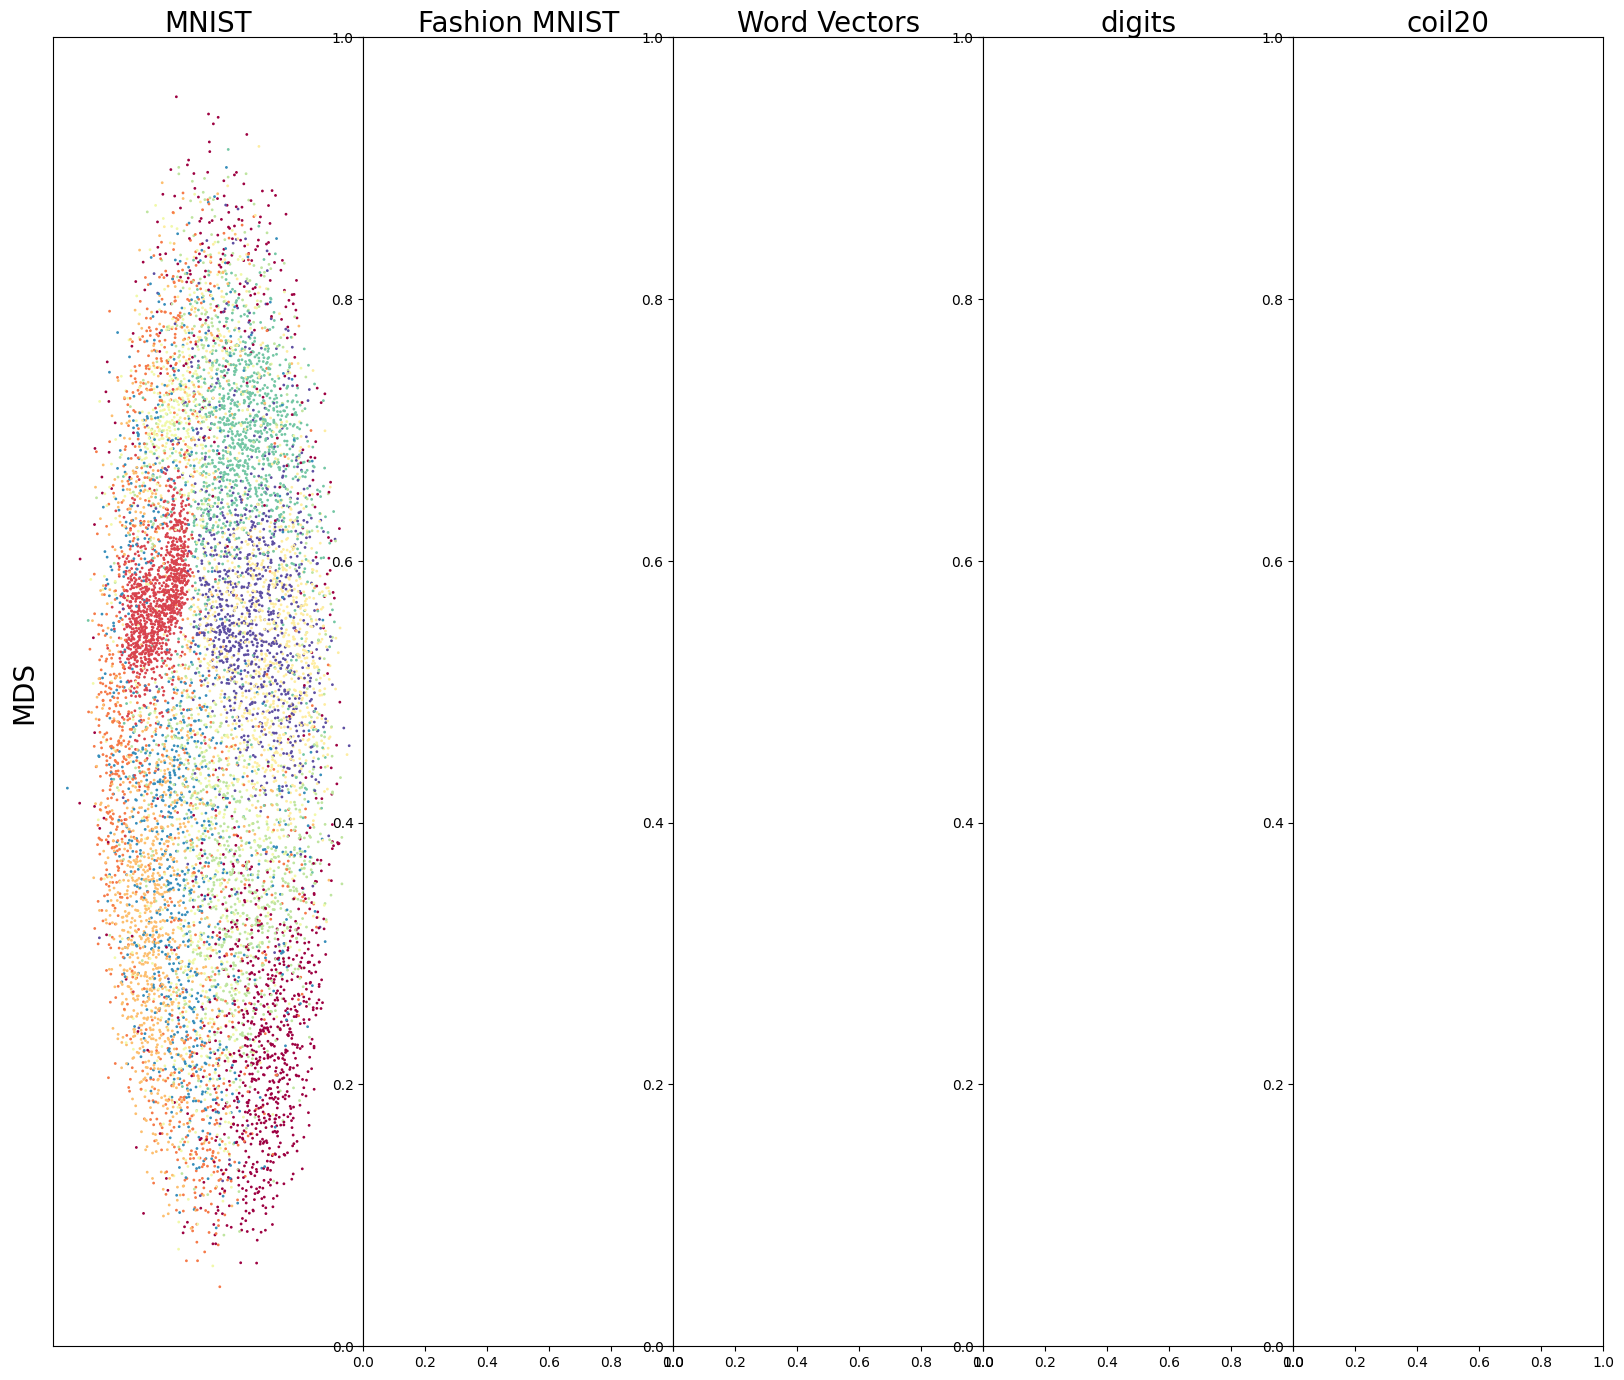

In [53]:
rows = 1
cols = len(datasets)
fig = plt.figure(figsize=(20, 17))
gs = fig.add_gridspec(rows, cols, hspace=0, wspace=0)
ax = gs.subplots()
for j in range(cols):
    ax[j].set_xlabel(datasets[j][0], fontsize=20)   
    ax[j].xaxis.set_label_position('top') 

for i in range(rows):
    ax[0].set_ylabel(models[i][0], fontsize=20)   
    
for j in range(cols):
    display(f"{models[0][0]} is working with {datasets[j][0]} ({datasets[j][1].shape} objects)...")
    start = time.time()
    embedding = models[0][1].fit_transform(datasets[j][1])

        
    ax[j].scatter(embedding[:, 0], embedding[:, 1], c=datasets[j][2], cmap='Spectral', s=1)
    ax[j].set_yticklabels([])
    ax[j].set_xticklabels([])
    ax[j].tick_params(left = False, bottom=False)
    display(f"Time: {int(time.time() - start)} seconds")